# Dissolve

In [1]:
import geopandas
import starepandas
import numpy
import pystare
import matplotlib.pyplot as plt
import datetime
import multiprocessing

In [2]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

## Manual merging SIDs
We are extracting all SIDS from the dataframe and merge them in a compressed range

In [3]:
continent = world[world.continent=='South America']
continent = starepandas.STAREDataFrame(continent, add_sids=True, level=7, add_trixels=True, n_partitions=1)
sids = numpy.concatenate(list(continent['sids']))

In [4]:
sids = numpy.unique(sids)
s_range = pystare.to_compressed_range(sids)
sids1 = pystare.expand_intervals(s_range , -1, multi_resolution=True)

In [5]:
# Equivalent to
sids2 = starepandas.compress_sids(sids)

In [6]:
continent

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,sids,trixels
9,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...","[1831874332805038087, 1831909517177126919, 183...","MULTIPOLYGON (((-68.10744 -55.31801, -67.97225..."
10,17789267,South America,Chile,CHL,436100.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335...","[1822268999224786951, 1822339367968964615, 182...","MULTIPOLYGON (((-70.49911 -54.87622, -70.66819..."
20,2931,South America,Falkland Is.,FLK,281.8,"POLYGON ((-61.20000 -51.85000, -60.00000 -51.2...","[1807104534854500359, 1807245272342855687, 180...","MULTIPOLYGON (((-60.67409 -51.68503, -59.57634..."
28,3360148,South America,Uruguay,URY,73250.0,"POLYGON ((-57.62513 -30.21629, -56.97603 -30.1...","[2632353982198054918, 2661627379775963142, 266...","MULTIPOLYGON (((-55.17662 -32.24790, -55.77960..."
29,207353391,South America,Brazil,BRA,3081000.0,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2...","[2749447572509687812, 2796735368597078020, 286...","MULTIPOLYGON (((-53.69934 -4.63080, -61.44765 ..."
30,11138234,South America,Bolivia,BOL,78350.0,"POLYGON ((-69.52968 -10.95173, -68.78616 -11.0...","[2684145377912815620, 2692026677260713989, 270...","MULTIPOLYGON (((-62.76428 -18.88667, -66.06621..."
31,31036656,South America,Peru,PER,410400.0,"POLYGON ((-69.89364 -4.29819, -70.79477 -4.251...","[2693152577167556612, 2699907976608612356, 268...","MULTIPOLYGON (((-74.96857 -15.27649, -72.04021..."
32,47698524,South America,Colombia,COL,688000.0,"POLYGON ((-66.87633 1.25336, -67.06505 1.13011...","[2666130979403333637, 2667256879310176261, 266...","MULTIPOLYGON (((-75.36119 8.42106, -76.79015 5..."
40,31304016,South America,Venezuela,VEN,468600.0,"POLYGON ((-60.73357 5.20028, -60.60118 4.91810...","[2486549944261935109, 2743255123022053381, 274...","MULTIPOLYGON (((-67.79536 8.98813, -70.10240 1..."
41,737718,South America,Guyana,GUY,6093.0,"POLYGON ((-56.53939 1.89952, -56.78270 1.86371...","[2767743445995880454, 2758489956136517639, 275...","MULTIPOLYGON (((-58.56295 5.89722, -59.38264 7..."


<AxesSubplot:>

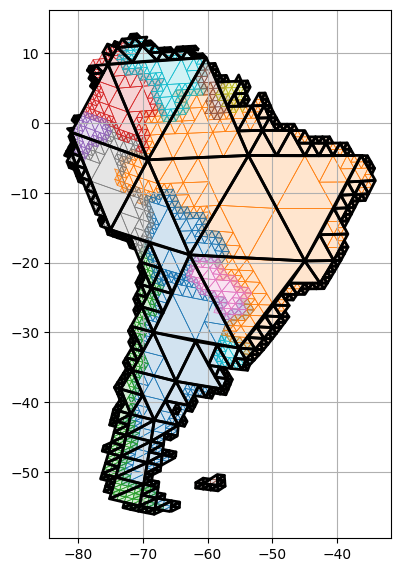

In [7]:
fig, ax = plt.subplots(dpi=100, figsize=(7, 7))
ax.grid(True)

continent.plot(ax=ax, trixels=True, boundary=False, column='name', zorder=0, linewidth=2, alpha=0.2)
continent.plot(ax=ax, trixels=True, boundary=True, column='name', zorder=0, linewidth=0.5)

df = starepandas.STAREDataFrame(sids=[sids2], add_trixels=True)
df.plot(ax=ax, trixels=True, boundary=True, color='black', zorder=2, linewidth=2)

#plt.savefig('dissolve.png')

## High level functions

In [8]:
west = world[world['continent'].isin(['Europe', 'North America'])]
west = starepandas.STAREDataFrame(west, add_sids=True, level=4, add_trixels=False)

In [9]:
west.stare_dissolve(by='continent', aggfunc='first', geom=False)

,sids,pop_est,name,iso_a3,gdp_md_est
continent,,,,,
Europe,"[648518346341351428, 900719925474099204, 10448...",142257519,Russia,RUS,3745000.0
North America,"[1170935903116328964, 1173187702930014212, 117...",35623680,Canada,CAN,1674000.0


In [10]:
west.dissolve(by='continent', aggfunc='sum')

,geometry,pop_est,gdp_md_est
continent,,,
Europe,"MULTIPOLYGON (((-53.555 2.335, -53.779 2.377, ...",746398461,25284877.0
North America,"MULTIPOLYGON (((-155.222 19.240, -155.542 19.0...",573042112,23505137.0


## Multiprocessing

### By continent

In [11]:
start = datetime.datetime.now()
west.stare_dissolve(by='continent', geom=False, num_workers=1)
print(datetime.datetime.now() - start)

0:00:08.077438


In [12]:
start = datetime.datetime.now()
west.stare_dissolve(by='continent', geom=False, num_workers=4)
print(datetime.datetime.now() - start)

0:00:04.526651


In [13]:
trixels = west.make_trixels(num_workers=4, wrap_lon=False)
trixels = starepandas.split_antimeridian_series(trixels, drop=True)
west.set_trixels(trixels, inplace=True)

<AxesSubplot:>

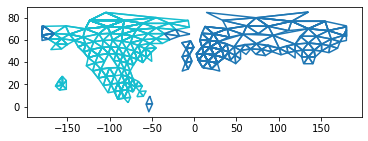

In [14]:
west.reset_index().plot(column='continent')